In [2]:
import nltk, os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from funcoes_de_contagem import lista_de_mais_frequentes_calibrada, itera_ou_abre_arquivos
from itertools import combinations

### Lista de Frenquencia da Lista de Frequencia

In [3]:
termos_mais_usados = lista_de_mais_frequentes_calibrada("corpus_comentarios_elis","pt.txt",1200)
lista_dez_termos_mais_usados = [termo[0] for termo in termos_mais_usados.most_common(16)]

Nº Caracteres corpora: corpus_comentarios_elis - 
411650
Nº Caracteres corpora: pt.txt - 
17034654


In [4]:
lista_dez_termos_mais_usados

['parabéns',
 'propaganda',
 'comercial',
 'elis',
 '❤',
 'lindo',
 'volkswagen',
 'linda',
 'vw',
 'emocionante',
 'ditadura',
 'regina',
 'fusca',
 'você']

In [5]:
# Itera os arquivo de comentários e tranforma-os em uma lista de strings
pasta_corpus = "corpus_comentarios_elis/"
lista_de_comentarios = []
for arquivo in os.listdir(pasta_corpus):
    # Verifica se o arquivo é um txt
    if arquivo.endswith(".txt"):
        caminho_arquivo = os.path.join(pasta_corpus, arquivo)
        with open(caminho_arquivo, "r", encoding="utf-8") as f:
            comentario = f.read().strip()  # Remove espaços extras
            lista_de_comentarios.append(comentario)

In [7]:
# Pega o primeiro item da lista de palavras mais comuns
# Itera os comentários
# Tokeniza o comentário
# Verifica se a palavra da lista de mais comuns esta presente no comentário
# Adiciona o comentário a uma string
# Roda o mostcomom na string

In [34]:
termo_alvo = lista_dez_termos_mais_usados[10]
print(termo_alvo)
comentarios_com_termo_alvo = ""
for comentario in lista_de_comentarios:
    comentario_tokenizado = word_tokenize(comentario.lower())
    if termo_alvo in comentario_tokenizado:
        comentarios_com_termo_alvo = comentarios_com_termo_alvo + " " + comentario

ditadura


In [35]:
teste = lista_de_mais_frequentes_calibrada(
    caminho_corpus_especifico=comentarios_com_termo_alvo,
    caminho_corpus_geral="pt.txt",
    limiar=100,
    raw=False
)

Nº Caracteres corpora: pt.txt - 
17034654


In [36]:
teste.most_common(10)

[('ditadura', 144),
 ('elis', 80),
 ('apoiou', 59),
 ('empresa', 53),
 ('música', 38),
 ('contra', 38),
 ('volkswagen', 36),
 ('propaganda', 34),
 ('imagem', 33),
 ('militar', 30)]

In [37]:
termo_alvo_1 = "ditadura"
termo_alvo_2 = "elis"
comentarios_com_termo_alvo = ""
for comentario in lista_de_comentarios:
    comentario_tokenizado = word_tokenize(comentario.lower())
    if termo_alvo_1 in comentario_tokenizado and termo_alvo_2 in comentario_tokenizado:
        comentarios_com_termo_alvo = comentarios_com_termo_alvo + " " + comentario

teste2 = lista_de_mais_frequentes_calibrada(
    caminho_corpus_especifico=comentarios_com_termo_alvo,
    caminho_corpus_geral="pt.txt",
    limiar=100,
    raw=False
)

Nº Caracteres corpora: pt.txt - 
17034654


In [38]:
teste2.most_common(10)

[('elis', 80),
 ('ditadura', 71),
 ('empresa', 32),
 ('apoiou', 27),
 ('regina', 25),
 ('volkswagen', 23),
 ('propaganda', 22),
 ('imagem', 20),
 ('ditadura,', 17),
 ('militar', 13)]

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/bertolo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bertolo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Modelo 'punkt' já está disponível.


In [4]:
# Itera os arquivo de comentários e tranforma-os em uma lista de strings
# Pasta onde estão os arquivos

pasta_corpus = "corpus_comentarios_elis/"
lista_de_comentarios = []
# Para cada arquivo dentro de uma pasta
for arquivo in os.listdir(pasta_corpus):
    if arquivo.endswith(".txt"):
        caminho_arquivo = os.path.join(pasta_corpus, arquivo)

        # Abre e lê o arquivo
        with open(caminho_arquivo, "r", encoding="utf-8") as f:
            comentario = f.read().strip()  # Remove espaços extras
            lista_de_comentarios.append(comentario)

In [22]:
textos = [
    "gato dorme no sofá",
    "cachorro corre no parque",
    "gato brinca com novelo",
    "mercado financeiro sobe",
    "ações da bolsa caem"
]

In [23]:
# 1. Juntar todos os textos
texto_unico = " ".join(textos)
# Palavra alvo
palavra_alvo = "gato"

In [24]:
# 2. Tokenizar (separar em palavras) e limpar stopwords
tokens = word_tokenize(texto_unico.lower())
stop_words = set(stopwords.words('portuguese'))
tokens_limpos = [t for t in tokens if t.isalpha() and t not in stop_words]

In [25]:
# 3. Criar pares apenas envolvendo a palavra alvo
pares_alvo = []
window_size = 2

for i in range(len(tokens_limpos) - window_size + 1):
    window = tokens_limpos[i:i + window_size]
    if palavra_alvo in window:
        # pega o par (palavra alvo + a outra)
        for palavra in window:
            if palavra != palavra_alvo:
                pares_alvo.append((palavra_alvo, palavra))

In [26]:

# 4. Contar frequência dos pares
contagem_pares = Counter(pares_alvo)

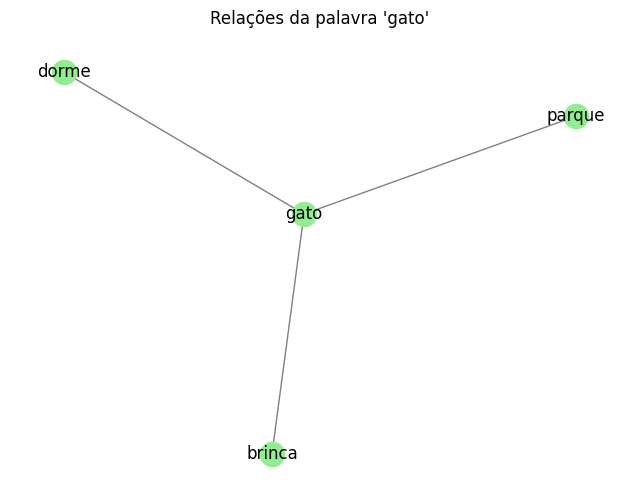

In [27]:
# 5. Criar grafo focado
G = nx.Graph()

for (palavra1, palavra2), peso in contagem_pares.items():
    G.add_edge(palavra1, palavra2, weight=peso)

# 6. Visualizar grafo
pos = nx.spring_layout(G, k=0.5)
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos,
                 with_labels=True,
                 node_color='lightgreen',
                 edge_color='gray',
                 font_size=12,
                 width=[G[u][v]['weight'] for u,v in G.edges()])
plt.title(f"Relações da palavra '{palavra_alvo}'")
plt.axis('off')
plt.show()